<a href="https://colab.research.google.com/github/Prayag79/Deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torch import nn ## nn contains all of Pytorchs building blocks for neural network
import matplotlib.pyplot as plt

In [10]:
# create known parameters
weight = 0.7
bias = 0.3


# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10] , len(X) , len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [11]:
#Test train split
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [12]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  #plot test data
  plt.scatter(test_data, test_labels ,c = 'r' , s = 4 , label = 'Testing data')

  #are there any predictions ?
  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=4,label='Predictions')

  plt.legend(prop={'size':14})


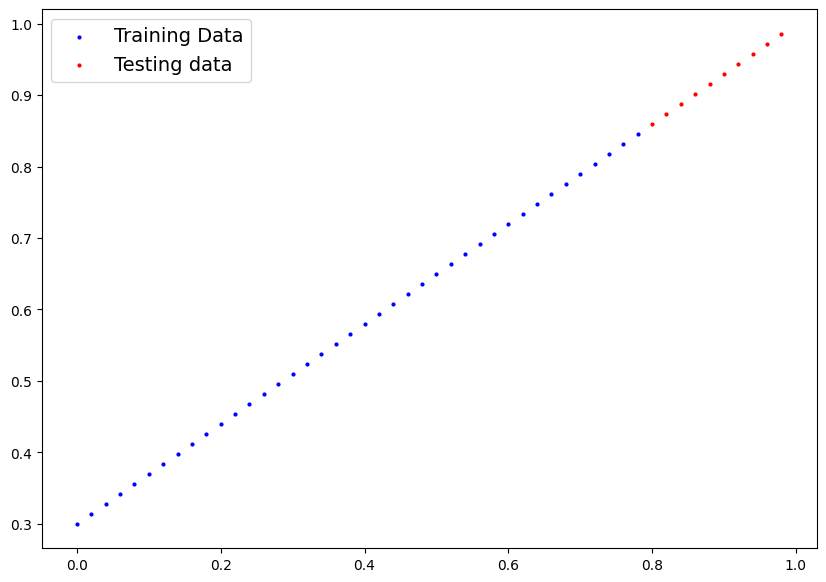

In [13]:
plot_predictions()

In [14]:
# build model(linear regression)
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float32))
  def forward(self, x):
    return self.weights * x + self.bias